Shape of dataset: (891, 12)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary Statistics:

        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN      

<Figure size 1000x600 with 0 Axes>

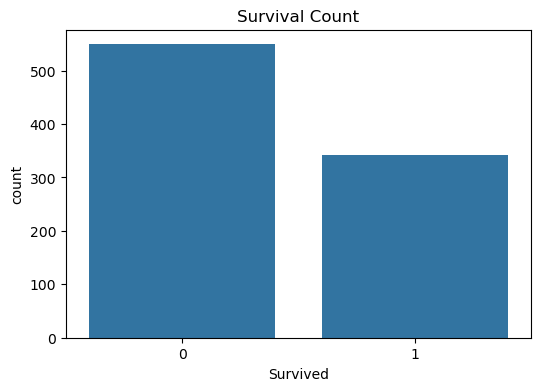

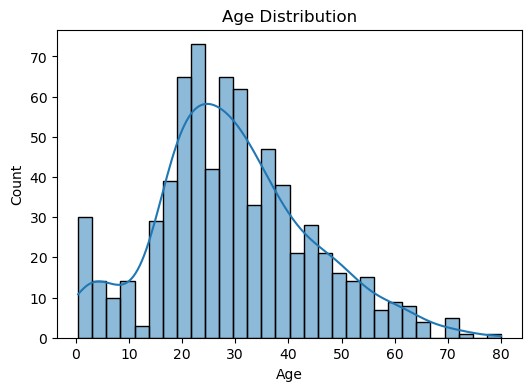

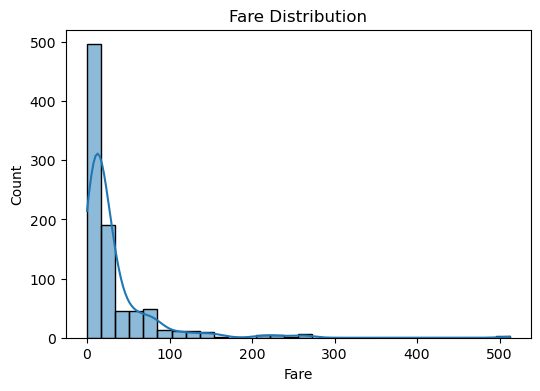

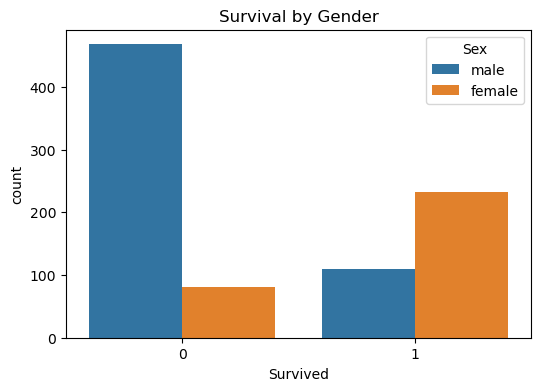

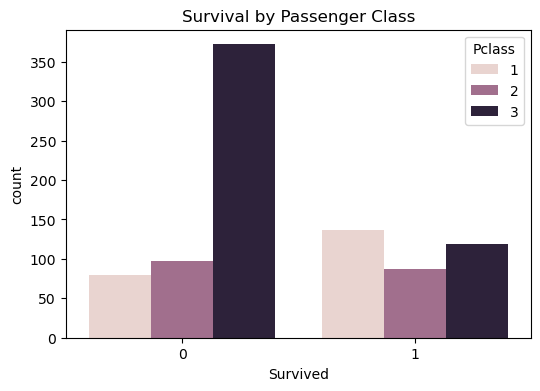

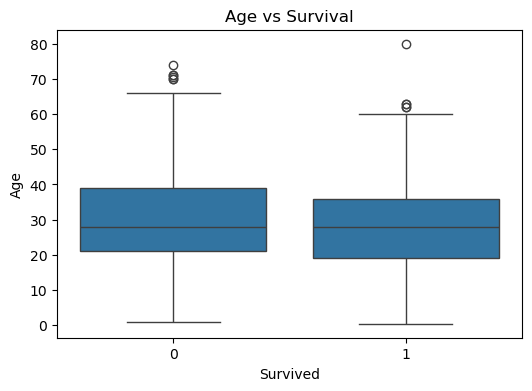

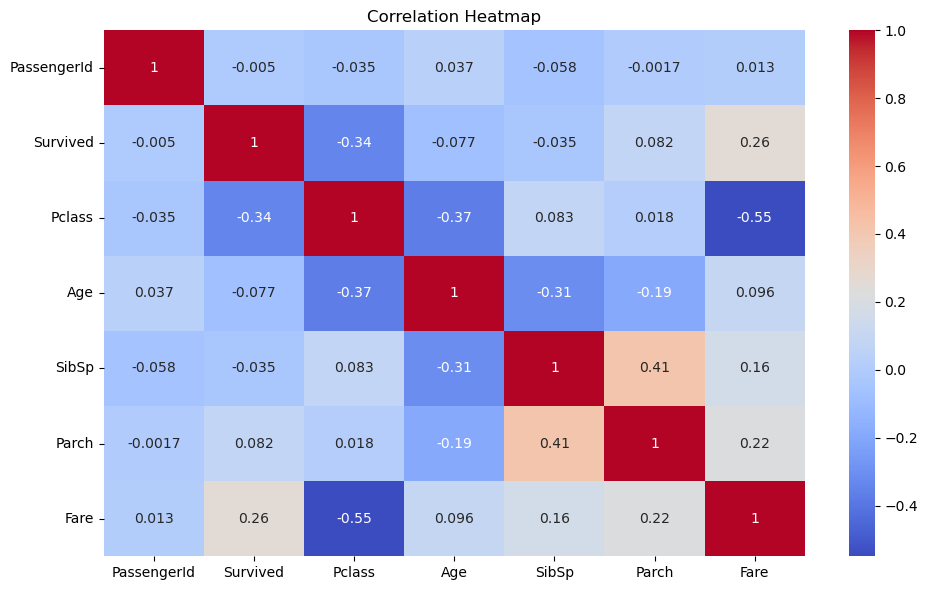

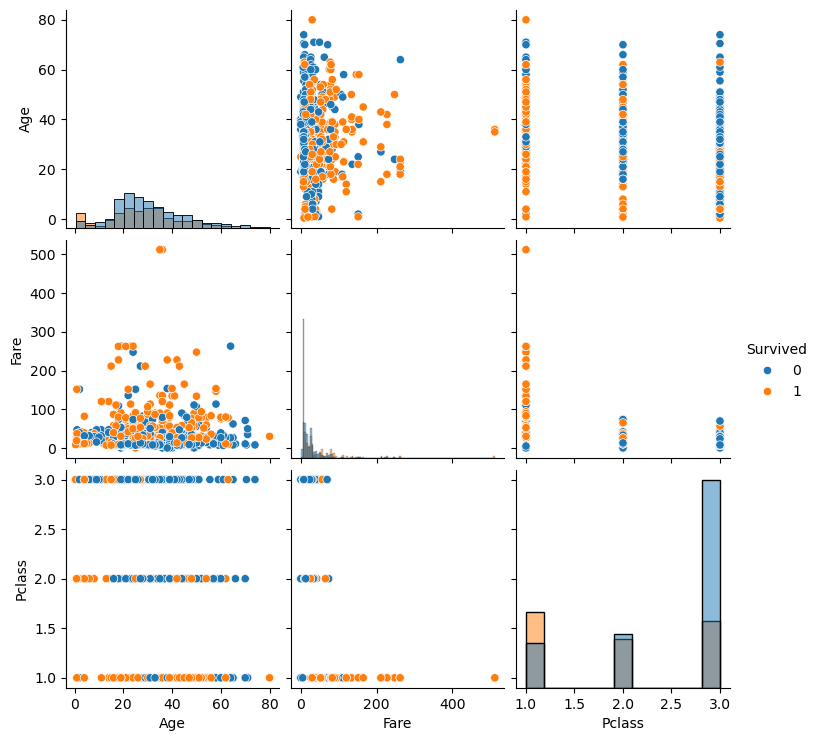

Missing Values Before Cleaning:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values After Cleaning:

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

--- Key Insights ---
1. More females survived than males.
2. Higher-class passengers (Pclass=1) had higher survival rates.
3. Younger passengers had slightly better survival chances.
4. Fare is positively correlated with survival.
5. Age distribution is slightly right-skewed.


C:\Users\MSAF\AppData\Local\Temp\ipykernel_7736\404001527.py:96: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\MSAF\AppData\Local\Temp\ipykernel_7736\404001527.py:97: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [2]:
# ============================
# TITANIC DATASET - EDA SCRIPT
# ============================

# Install libraries if not already installed (uncomment if needed)
# !pip install pandas matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inside notebook
%matplotlib inline

# ----------------------------
# 1. Load Dataset
# ----------------------------
# Make sure you downloaded "train.csv" from Kaggle Titanic dataset
# and placed it in the same folder as this notebook.
df = pd.read_csv("train.csv")

# ----------------------------
# 2. Basic Exploration
# ----------------------------
print("Shape of dataset:", df.shape)
print("\nDataset Info:\n")
print(df.info())
print("\nSummary Statistics:\n")
print(df.describe(include="all"))

print("\nMissing Values:\n")
print(df.isnull().sum())

# ----------------------------
# 3. Univariate Analysis
# ----------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title("Fare Distribution")
plt.show()

# ----------------------------
# 4. Bivariate Analysis
# ----------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", hue="Sex", data=df)
plt.title("Survival by Gender")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="Survived", hue="Pclass", data=df)
plt.title("Survival by Passenger Class")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Age vs Survival")
plt.show()

# ----------------------------
# 5. Multivariate Analysis
# ----------------------------
plt.figure(figsize=(10,6))
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Create pairplot for selected variables
# Make sure 'Survived' is converted to numeric if it's not already
sns.pairplot(df[["Survived", "Age", "Fare", "Pclass"]], hue="Survived", diag_kind="hist")
plt.show()

# ----------------------------
# 6. Handle Missing Data
# ----------------------------
# Check missing values before cleaning
print("Missing Values Before Cleaning:\n")
print(df.isnull().sum())

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

# Check missing values after cleaning
print("\nMissing Values After Cleaning:\n")
print(df.isnull().sum())

# ----------------------------
# 7. Observations
# ----------------------------
print("\n--- Key Insights ---")
print("1. More females survived than males.")
print("2. Higher-class passengers (Pclass=1) had higher survival rates.")
print("3. Younger passengers had slightly better survival chances.")
print("4. Fare is positively correlated with survival.")
print("5. Age distribution is slightly right-skewed.")